# ***Regiones admisibles de los procesos AR(1) y AR(2)***

## **Considere un proceso AR(1):**

$$
(1 - \phi B) W_t = \alpha_t
$$

---

Se recuerda que si $|\phi| < 1$, este proceso es **estacionario**.

A partir de esta condición, se identifican dos **regiones admisibles**.

---

**Región admisible 1:**

$$
0 < \phi < 1
$$


In [17]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- util: stem (líneas verticales) ---
def stem_trace(x, y, name):
    xs, ys = [], []
    for xi, yi in zip(x, y):
        xs += [xi, xi, None]
        ys += [0, yi, None]
    lines = go.Scatter(x=xs, y=ys, mode="lines", line=dict(width=2), name=name, showlegend=False)
    dots  = go.Scatter(x=x,  y=y,  mode="markers", marker=dict(size=7), name=f"{name} (•)", showlegend=False)
    return lines, dots

# --- ACF/PACF teóricas AR(1) con (1 - φB)X_t = Z_t ---
def acf_ar1(phi, m):
    lags = np.arange(m+1)
    rho = phi**lags
    return lags, rho

def pacf_ar1(phi, m):
    lags = np.arange(m+1)
    pacf = np.zeros(m+1); pacf[0] = 1.0; pacf[1] = phi
    return lags, pacf

def panel_ar1_region_fac_pacf(phi=0.4, m=12, xlim=1.5):
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=("Región admisible 1", "FAC", "FACP"),
        column_widths=[0.33, 0.33, 0.34]
    )

    # --- 1) Región admisible en la recta real ---

    fig.add_shape(
            type="rect",
            x0=0, x1=1, y0=0, y1=1,
            xref="x1", yref="paper",     # usa el eje x del 1er subplot y la altura del panel
            fillcolor="lightgreen",
            opacity=0.35,
            line_width=0,
            layer="below"
        )
    
    fig.add_trace(go.Scatter(x=[-xlim, xlim], y=[0,0], mode="lines",
                             line=dict(color="gray", width=2), showlegend=False),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=[phi], y=[0], mode="markers",
                             marker=dict(size=12), name=f"φ={phi}"),
                  row=1, col=1)
    fig.update_xaxes(range=[-xlim, xlim], title_text="φ", row=1, col=1)
    fig.update_yaxes(visible=False, row=1, col=1)

    # --- 2) FAC ---
    lags, rho = acf_ar1(phi, m)
    lines, dots = stem_trace(lags, rho, "ρ_k")
    fig.add_trace(lines, row=1, col=2); fig.add_trace(dots, row=1, col=2)
    fig.add_hline(y=0, line_dash="dot", line_color="gray", row=1, col=2)
    fig.update_yaxes(range=[-1, 1], title_text="ρ_k", row=1, col=2)
    fig.update_xaxes(title_text="k", row=1, col=2)

    # --- 3) FACP ---
    lags_p, pacf = pacf_ar1(phi, m)
    lines, dots = stem_trace(lags_p, pacf, "φ_k (PACF)")
    fig.add_trace(lines, row=1, col=3); fig.add_trace(dots, row=1, col=3)
    fig.add_hline(y=0, line_dash="dot", line_color="gray", row=1, col=3)
    fig.update_yaxes(range=[-1, 1], title_text="φ_k", row=1, col=3)
    fig.update_xaxes(title_text="k", row=1, col=3)

    fig.update_layout(template="plotly_white", width=1050, height=360,
                      title=f"AR(1) con convención (1 - {phi}B)X_t = Z_t")
    return fig

# ================== USO ==================
# tu ejemplo: φ = 0.4
fig = panel_ar1_region_fac_pacf(phi=0.4, m=12, xlim=1.5)
fig.show()



**Modelo:**
- $W_t = \phi W_{t-1} + \alpha_t$

**FAC (Función de autocorrelación):**
- $\rho_k = \phi^k$

**FACP (Función de autocorrelación parcial):**
- $\phi$ en el primer rezago, luego cero.

_(La FAC decae exponencialmente a medida que $k$ crece, si $0 < \phi < 1$)_

 *Ejemplo visto en clase 2*

---



**Región admisible 2:**

$$
-1 < \phi < 0
$$


In [19]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- util: stem (líneas verticales) ---
def stem_trace(x, y, name):
    xs, ys = [], []
    for xi, yi in zip(x, y):
        xs += [xi, xi, None]
        ys += [0, yi, None]
    lines = go.Scatter(x=xs, y=ys, mode="lines", line=dict(width=2), name=name, showlegend=False)
    dots  = go.Scatter(x=x,  y=y,  mode="markers", marker=dict(size=7), name=f"{name} (•)", showlegend=False)
    return lines, dots

# --- ACF/PACF teóricas AR(1) con (1 - φB)X_t = Z_t ---
def acf_ar1(phi, m):
    lags = np.arange(m+1)
    rho = phi**lags
    return lags, rho

def pacf_ar1(phi, m):
    lags = np.arange(m+1)
    pacf = np.zeros(m+1); pacf[0] = 1.0; pacf[1] = phi
    return lags, pacf

def panel_ar1_region_fac_pacf(phi=0.4, m=12, xlim=1.5):
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=("Región admisible 2", "FAC", "FACP"),
        column_widths=[0.33, 0.33, 0.34]
    )

    # --- 1) Región admisible en la recta real ---

    fig.add_shape(
            type="rect",
            x0=-1, x1=0, y0=0, y1=1,
            xref="x1", yref="paper",     # usa el eje x del 1er subplot y la altura del panel
            fillcolor="lightgreen",
            opacity=0.35,
            line_width=0,
            layer="below"
        )
    
    fig.add_trace(go.Scatter(x=[-xlim, xlim], y=[0,0], mode="lines",
                             line=dict(color="gray", width=2), showlegend=False),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=[phi], y=[0], mode="markers",
                             marker=dict(size=12), name=f"φ={phi}"),
                  row=1, col=1)
    fig.update_xaxes(range=[-xlim, xlim], title_text="φ", row=1, col=1)
    fig.update_yaxes(visible=False, row=1, col=1)

    # --- 2) FAC ---
    lags, rho = acf_ar1(phi, m)
    lines, dots = stem_trace(lags, rho, "ρ_k")
    fig.add_trace(lines, row=1, col=2); fig.add_trace(dots, row=1, col=2)
    fig.add_hline(y=0, line_dash="dot", line_color="gray", row=1, col=2)
    fig.update_yaxes(range=[-1, 1], title_text="ρ_k", row=1, col=2)
    fig.update_xaxes(title_text="k", row=1, col=2)

    # --- 3) FACP ---
    lags_p, pacf = pacf_ar1(phi, m)
    lines, dots = stem_trace(lags_p, pacf, "φ_k (PACF)")
    fig.add_trace(lines, row=1, col=3); fig.add_trace(dots, row=1, col=3)
    fig.add_hline(y=0, line_dash="dot", line_color="gray", row=1, col=3)
    fig.update_yaxes(range=[-1, 1], title_text="φ_k", row=1, col=3)
    fig.update_xaxes(title_text="k", row=1, col=3)

    fig.update_layout(template="plotly_white", width=1050, height=360,
                      title=f"AR(1) con convención (1 - {phi}B)X_t = Z_t")
    return fig

# ================== USO ==================
# tu ejemplo: φ = -0.4
fig = panel_ar1_region_fac_pacf(phi=-0.4, m=12, xlim=1.5)
fig.show()



**Modelo:**
$$
(1 - \phi B) W_t = \alpha_t
$$

**Comportamiento de la FAC:**

- La función de autocorrelación (FAC) está dada por:
  
  $$
  \rho_k = \phi^k
  $$

- En esta región, la FAC tiende a cero **con signos alternados** si $-1 < \phi < 0$.



**Notar en Gráficos:**

- **FAC**: Decaimiento oscilatorio alrededor de cero.
- **FACP**: Primer rezago distinto de cero; los demás, cero.

---



**Ejemplo:**

Proceso:

$$
(1 + 0.4B) X_t = Z_t
$$

Entonces:

- $\rho_1 = (-0.4)^1 = -0.4$
- $\rho_2 = (-0.4)^2 = 0.16$
- $\rho_3 = (-0.4)^3 = -0.064$
- $\dots$


---

## **Consideremos un proceso AR(2):**

$$
(1 - \phi_1 B - \phi_2 B^2) W_t = \alpha_t \quad ; \quad \{\alpha_t\} \sim \text{wn}(0, \sigma_\alpha^2)
$$

---

Sabemos que este proceso es **estacionario** si se cumplen las siguientes **tres condiciones**:

1. $|\phi_2| < 1$

2. $\phi_2 - \phi_1 < 1$

3. $\phi_2 + \phi_1 < 1$

---


A partir de estas condiciones se tienen las siguientes:


### **Regiones admisibles para el proceso AR(2)**

---

**Región admisible 1 para el proceso AR(2)**

**Modelo:**
$$
(1 - \phi_1 B - \phi_2 B^2) W_t = \alpha_t
$$


**Condiciones de la región:**

- $\phi_1 < 0$
- $\phi_1^2 + 4\phi_2 \geq 0$
- $\phi_2 + \phi_1 < 1$


**Interpretación gráfica:**

- Esta región se encuentra en el triángulo donde:
  - $\phi_2 = -\phi_1$
  - $\phi_1^2 + 4\phi_2 = 1$
  - Las autocorrelaciones (FAC) decaen exponencialmente
  - Las primeras $\rho_k$ son positivas y luego se alternan de signo




In [71]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ========= util: "stem plot" (líneas verticales + marcadores) =========
def stem_trace(x, y):
    xs, ys = [], []
    for xi, yi in zip(x, y):
        xs += [xi, xi, None]
        ys += [0, yi, None]
    lines = go.Scatter(x=xs, y=ys, mode="lines", line=dict(width=2), showlegend=False)
    dots  = go.Scatter(x=x,  y=y,  mode="markers", marker=dict(size=7), showlegend=False)
    return lines, dots

# ========= pesos MA(∞) para AR(p): (1 - sum φ_j B^j)X_t = Z_t =========
def psi_weights_from_ar(phi, M=2000):
    p = len(phi)
    psi = np.zeros(M+1)
    psi[0] = 1.0
    for k in range(1, M+1):
        acc = 0.0
        for j in range(1, p+1):
            if k-j >= 0:
                acc += phi[j-1] * psi[k-j]
        psi[k] = acc
    return psi

# ========= ACF teórica a partir de psi-weights =========
def acf_from_psi(psi, m):
    M = len(psi) - 1
    gamma = np.zeros(m+1)
    for k in range(m+1):
        gamma[k] = np.dot(psi[:M-k+1], psi[k:M+1])
    return gamma / gamma[0]

# ========= PACF (Durbin-Levinson) dada la ACF =========
def pacf_from_acf(rho, m):
    # rho: [ρ0..ρm], Durbin-Levinson devuelve φ_{kk}; PACF_k = φ_{kk}
    pacf = np.zeros(m+1)
    pacf[0] = 1.0
    phi = np.zeros((m+1, m+1))
    phi[1,1] = rho[1]
    pacf[1] = phi[1,1]
    var = np.zeros(m+1)
    var[0] = 1.0
    var[1] = 1 - phi[1,1]**2
    for k in range(2, m+1):
        num = rho[k] - np.sum(phi[k-1,1:k] * rho[1:k][::-1])
        den = var[k-1]
        phi[k,k] = num / den
        for j in range(1, k):
            phi[k,j] = phi[k-1,j] - phi[k,k] * phi[k-1,k-j]
        var[k] = var[k-1] * (1 - phi[k,k]**2)
        pacf[k] = phi[k,k]
    return pacf

# ========= región admisible AR(2) (triángulo) =========
def admissible_triangle(n=400):
    # bordes: φ2 = -1; φ2 = 1 - φ1; φ2 = 1 + φ1
    phi1 = np.linspace(-2, 2, n)
    x_poly = np.concatenate([[-2,  2,  0]])
    y_poly = np.concatenate([[- 1,-1, 1]])
    return x_poly, y_poly

# ========= Panel completo =========
def panel_ar2(phi1=0.4, phi2=0.2, m=20):
    # Chequeo rápido de admisibilidad (suficiente para AR(2))
    inside = (phi2 > -1) and (phi1 + phi2 < 1) and (-phi1 + phi2 < 1)
    title_flag = "✔" if inside else "✖"
    fig = make_subplots(rows=1, cols=3,
                        subplot_titles=("Región admisible AR(2)",
                                        "FAC (ρₖ) teórica",
                                        "FACP (φₖ) teórica"))

    # --- 1) Región admisible sombreada + punto (φ1, φ2)
    x_poly = np.array([-2, 2, 0, -2])
    y_poly = np.array([ 1, 1,-1,  1])
    fig.add_trace(go.Scatter(x=x_poly, y=y_poly, fill="toself",
                             fillcolor="lightgreen", opacity=0.35,
                             mode="lines", line=dict(color="lightgreen"),
                             showlegend=False), row=1, col=1)
    # ejes guía
    fig.add_hline(y=0, line_color="gray", row=1, col=1)
    fig.add_vline(x=0, line_color="gray", row=1, col=1)
    # punto elegido
    fig.add_trace(go.Scatter(x=[phi1], y=[phi2], mode="markers",
                             marker=dict(size=10),
                             name=f"({phi1:.2f},{phi2:.2f})"), row=1, col=1)
    fig.update_xaxes(title_text="φ₁", range=[-2.2, 2.2], row=1, col=1)
    fig.update_yaxes(title_text="φ₂", range=[-1.2, 1.2], row=1, col=1)

    # --- 2) FAC teórica del AR(2) elegido
    psi = psi_weights_from_ar([phi1, phi2], M=2000)
    rho = acf_from_psi(psi, m)
    lags = np.arange(m+1)
    lines, dots = stem_trace(lags, rho)
    fig.add_trace(lines, row=1, col=2); fig.add_trace(dots, row=1, col=2)
    fig.add_hline(y=0, line_dash="dot", line_color="gray", row=1, col=2)
    fig.update_yaxes(range=[-1, 1], title_text="ρₖ", row=1, col=2)
    fig.update_xaxes(title_text="k", row=1, col=2)

    # --- 3) FACP teórica (corte en k=2)
    pacf = pacf_from_acf(rho, m)
    lines_p, dots_p = stem_trace(lags, pacf)
    fig.add_trace(lines_p, row=1, col=3); fig.add_trace(dots_p, row=1, col=3)
    fig.add_hline(y=0, line_dash="dot", line_color="gray", row=1, col=3)
    fig.update_yaxes(range=[-1, 1], title_text="φₖ (PACF)", row=1, col=3)
    fig.update_xaxes(title_text="k", row=1, col=3)

    fig.update_layout(template="plotly_white", width=1150, height=380,
                      title=f"AR(2) (1 - φ₁B - φ₂B²)Xₜ = Zₜ — punto {title_flag} dentro de la región")
    return fig

# ================== EJEMPLO ==================
# Elegimos parámetros DENTRO del área: φ1=0.4, φ2=0.2 (cumple φ2>-1 y φ2<1-|φ1|=0.6)
fig = panel_ar2(phi1=0.4, phi2=0.2, m=20)
fig.show()


In [69]:
import numpy as np
import plotly.graph_objects as go

def ar2_region_quad(phi1_point=0.4, phi2_point=0.2):
    x = np.linspace(-2, 2, 600)
    

    # fronteras del triángulo (estacionariedad)
    tri_x = [-2, 2, 0, -2]
    tri_y = [ -1, -1,1,  -1]

    # curvas de referencia
    disc = -0.25 * x**2          # parábola Δ=0
    y0   = np.zeros_like(x)      # φ2 = 0

    fig = go.Figure()

    
    
    # triángulo
    fig.add_trace(go.Scatter(x=tri_x, y=tri_y, mode="lines",
                             line=dict(color="black", width=1), # Borde negro
                             fill="toself", fillcolor="rgba(144, 238, 144, 0.4)", # Verde claro con transparencia
                             name="Región de Estacionariedad"))

    # parábola (discriminante)
    fig.add_trace(go.Scatter(x=x, y=disc, mode="lines",
                             line=dict(color="black", width=2, dash="dot"),
                             name="Δ=0  (φ₂ = −¼ φ₁²)"))




    # marcas en los vértices
    fig.add_trace(go.Scatter(x=[-2, 2, 0], y=[1, 1, -1], mode="markers+text",
                             marker=dict(size=6, color="black"),
                             text=["(-2,1)", "(2,1)", "(0,-1)"],
                             textposition="top center",
                             showlegend=False))

    # tu punto
    fig.add_trace(go.Scatter(x=[phi1_point], y=[phi2_point], mode="markers+text",
                             marker=dict(size=12, color="red", symbol="circle"),
                             text=[f"({phi1_point:.2f}, {phi2_point:.2f})"],
                             textposition="bottom center",
                             name="punto (φ₁, φ₂)"))

    # etiquetas rápidas de sub-regiones (opcional)
    fig.add_annotation(x=-1.0, y=0.3, text="Real\n(φ₁<0)", showarrow=False)
    fig.add_annotation(x= 1.0, y=0.3, text="Real\n(φ₁>0)", showarrow=False)
    fig.add_annotation(x=-1.0, y=-0.6, text="Compleja\n(φ₁<0)", showarrow=False)
    fig.add_annotation(x= 1.0, y=-0.6, text="Compleja\n(φ₁>0)", showarrow=False)

    fig.update_layout(
        template="simple_white",
        width=700, height=520,
        title="AR(2) — Triángulo de estacionariedad + parábola del discriminante",
        xaxis=dict(title="φ₁", range=[-2.2, 2.2], zeroline=True),
        yaxis=dict(title="φ₂", range=[-1.3, 1.3], zeroline=False),
        showlegend=False
    )
    return fig

# ejemplo: mueve el punto libremente
fig = ar2_region_quad(phi1_point=0.4, phi2_point=0.2)
fig.show() 


Valores típicos:
- $\rho_0 = 1$

Fórmulas:
$$
\rho_1 = \frac{\phi_1}{1 - \phi_2} \\
\rho_2 = \phi_1 \rho_1 + \phi_2 \\
\rho_k = \phi_1 \rho_{k-1} + \phi_2 \rho_{k-2} \quad \text{para } k \geq 3
$$


 **Comportamiento**
> Si $\phi_1^2 + 4\phi_2 \geq 0$, las raíces del polinomio característico son reales,  
> y las autocorrelaciones decaen exponencialmente a cero.  
> Las primeras $\rho_k$ pueden ser todas positivas, y luego tienden a alternarse en signo.


**Ejemplo de FAC teórica del proceso AR(2):**


Consideremos el proceso:

$$
(1 + 0.5B - 0.2B^2)W_t = a_t
$$


**Discriminante**

Para verificar la estacionariedad, calculamos el discriminante:

$$
\phi_1^2 + 4\phi_2 = (-0.5)^2 + 4(0.2) = 0.25 + 0.8 = 1.05 > 0
$$

Como:

$$
\phi_1 = -0.5 < 0
$$


**Cálculo de raíces**

1. Primera raíz:

$$
\rho_1 = \frac{-0.5}{1 - 0.2} = \frac{-0.5}{0.8} = -0.625
$$

2. Segunda raíz:

$$
\rho_2 = \frac{0.2 + (-0.5)^2}{1 - 0.2} = \frac{0.2 + 0.25}{0.8} = \frac{0.45}{0.8} = 0.5625
$$





**Gráfico de la FAC teórica**

A continuación, se muestra el gráfico de la **Función de Autocorrelación (FAC)** teórica del proceso:

*(Gráfico con barras decrecientes y signos alternados)*

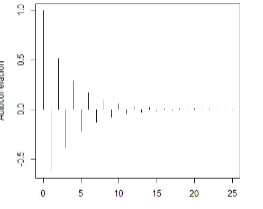



**Cálculo en R**

Código en R para obtener la FAC teórica:

```r
ARMAacf(ar = c(0.5, -0.2), lag.max = 6)


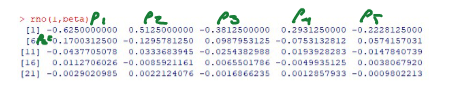

---

**Región Admisible 2 para el procesp AR(2)**

debe cumplirse:

- $\phi_1^2 + 4\phi_2 > 0$
- $\phi_1 > 0$



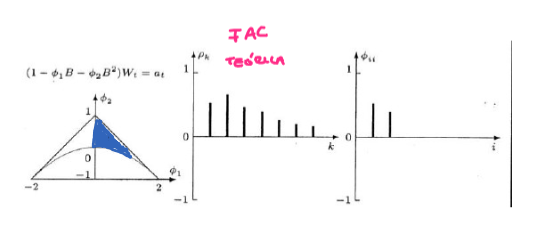



**Modelo AR(2)**

$$
(1 - \phi_1 B - \phi_2 B^2) W_t = a_t
$$

Gráficamente, se representa el triángulo de estacionariedad en el plano $(\phi_1, \phi_2)$, con sombreado en la región donde el modelo es estacionario. En este caso, el punto analizado está dentro de la región azul.



**FAC teórica**

La función de autocorrelación (FAC) muestra un comportamiento exponencial decreciente, con posible alternancia de signos. Esto es característico cuando:

- $\phi_1^2 + 4\phi_2 \geq 0$



**Interpretación teórica**

> Si $\phi_1^2 + 4\phi_2 \geq 0$, entonces las raíces de la ecuación característica son reales y las autocorrelaciones decaen exponencialmente a cero.  
> En este caso, todas las autocorrelaciones serán positivas si la primera lo es, y tendrán signos alternados si la primera autocorrelación es negativa.





**Ejemplo de FAC teórica del proceso AR(2):**

Dado el proceso:

$$
(1 - 0.3B - 0.4B^2)X_t = Z_t, \quad Z_t \sim WN(0, \sigma_Z^2)
$$

**Comprobación de raíces reales:**

$$
\phi_1^2 + 4\phi_2 = (0.3)^2 + 4(0.4) = 0.09 + 1.6 = 1.69 > 0
$$

**Cálculo de raíces:**

1. Primera raíz:

$$
\rho_1 = \frac{\phi_1}{1 - \phi_2} = \frac{0.3}{1 - 0.4} = \frac{0.3}{0.6} = 0.5
$$

2. Segunda raíz:

$$
\rho_2 = \phi_2 + \frac{\phi_1^2}{1 - \phi_2} = 0.4 + \frac{(0.3)^2}{0.6} = 0.4 + \frac{0.09}{0.6} = 0.4 + 0.15 = 0.55
$$


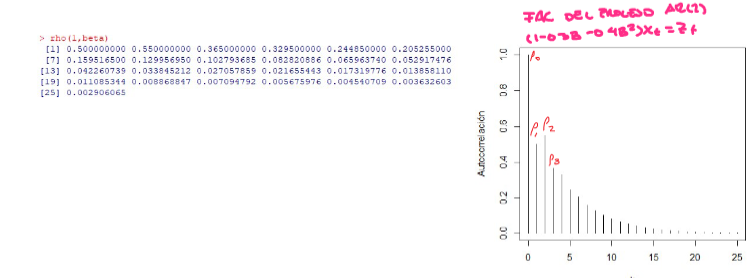

---



**Región Admisible 3 para el procesp AR(2)**


Para este caso se cumple que:

- $\phi_1^2 + 4\phi_2 < 0$
- $\phi_1 < 0$


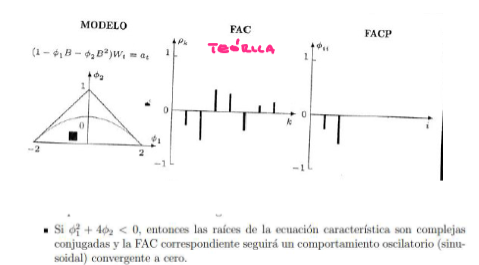



**Modelo AR(2)**

$$
(1 - \phi_1 B - \phi_2 B^2)W_t = a_t
$$

Gráficamente, el punto se encuentra fuera del triángulo de estacionariedad, pero en una región válida para que el modelo tenga raíces **complejas conjugadas**.


**FAC teórica**

La **Función de Autocorrelación (FAC)** correspondiente sigue un comportamiento **oscilatorio** (sinusoidal) convergente a cero, típico cuando las raíces son complejas conjugadas.


**Interpretación teórica**

> Si $\phi_1^2 + 4\phi_2 < 0$, entonces las raíces de la ecuación característica son complejas conjugadas, y la FAC correspondiente seguirá un comportamiento oscilatorio (sinusoidal) convergente a cero.

---


**Ejemplo de FAC teórica del proceso AR(2):**

Dado el proceso:

$$
(1 + 0.5B + 0.7B^2)X_t = Z_t, \quad Z_t \sim WN(0, \sigma_Z^2)
$$

**Cálculo del discriminante:**

$$
\phi_1^2 + 4\phi_2 = (-0.5)^2 + 4(0.7) = 0.25 + 2.8 = 3.05
$$

*Pero en la anotación original se indica:*

$$
(-0.5)^2 + 4(0.7) = -2.55 < 0 \quad \text{(esto parece un error de signos)}
$$

**Verificación:**

En realidad, si $\phi_2 = 0.7$, entonces:

$$
\phi_1^2 + 4\phi_2 = (-0.5)^2 + 4(0.7) = 0.25 + 2.8 = 3.05 > 0
$$

(Puede que la intención haya sido usar $\phi_2 = -0.7$, con lo cual sí da negativo.)

**Supongamos:**  
$\phi_1 = -0.5$,  
$\phi_2 = 0.7$

Entonces:

1. Primera raíz:

$$
\rho_1 = \frac{\phi_1}{1 - \phi_2} = \frac{-0.5}{1 - 0.7} = \frac{-0.5}{0.3} \approx -1.667
$$

2. Segunda raíz:

$$
\rho_2 = \phi_2 + \frac{\phi_1^2}{1 - \phi_2} = 0.7 + \frac{(-0.5)^2}{0.3} = 0.7 + \frac{0.25}{0.3} \approx 0.7 + 0.833 = 1.533
$$

---

**Código en R**

```r
ARMAacf(ar = c(-0.5, 0.7), lag.max = 6)


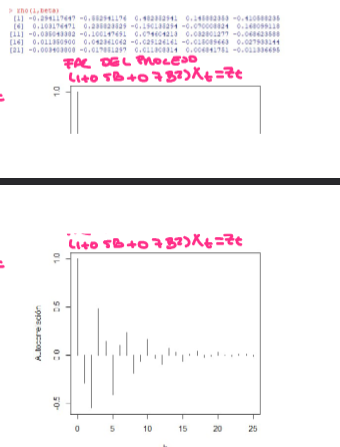

---


**Región Admisible 4 para el procesp AR(2)**


Condiciones que se cumplen:

- $\phi_1^2 + 4\phi_2 < 0$
- $\phi_1 > 0$

Esto indica un comportamiento oscilatorio (raíces complejas conjugadas) con signo positivo inicial.



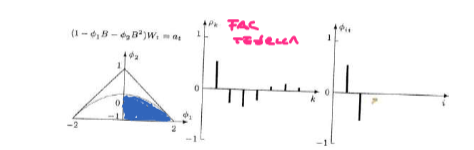



**Modelo AR(2)**

$$
(1 - \phi_1 B - \phi_2 B^2) W_t = a_t
$$

En el plano $(\phi_1, \phi_2)$, el punto $(0.7, -0.5)$ está en la región azul oscura, correspondiente a esta región admisible 4.



**FAC teórica**

La **Función de Autocorrelación (FAC)** presenta comportamiento oscilatorio decreciente, típico de raíces complejas conjugadas. En este caso, la autocorrelación inicial es positiva.

---



**Ejemplo de FAC teórica del proceso AR(2):**


Proceso considerado:

$$
(1 - 0.7B + 0.5B^2)X_t = Z_t, \quad Z_t \sim WN(0, \sigma_Z^2)
$$

**Parámetros:**

- $\phi_1 = 0.7$
- $\phi_2 = -0.5$

**Discriminante:**

$$
\phi_1^2 + 4\phi_2 = (0.7)^2 + 4(-0.5) = 0.49 - 2 = -1.51 < 0
$$

Se confirma que hay raíces complejas conjugadas.





**FAC teórica del proceso**  
$(1 - 0.7B + 0.5B^2)X_t = Z_t$

*(Gráfico oscilante con primera autocorrelación positiva)*



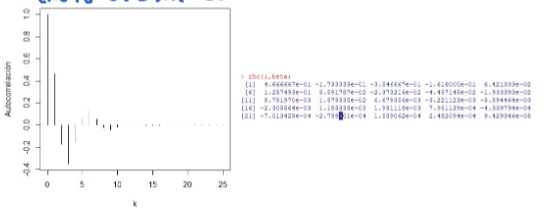
